In [2]:
import sympy
# from qiskit import QuantumCircuit
# start the pretty-printer to get nicely typeset math
sympy.init_printing()

from sympy.physics.quantum import Bra, Ket
from sympy import Matrix
from sympy.physics.quantum import TensorProduct
from sympy.physics.quantum.gate import HadamardGate,CNotGate, IdentityGate
from sympy.physics.quantum.qapply import qapply
from sympy import eye

from sympy.physics.quantum import Ket
from sympy import sqrt

In [3]:
#definition des états
ket0 = Matrix([1,0])
ket1 = Matrix([0,1])

α = sympy.Symbol("α")
β = sympy.Symbol("β")
ϕ = α * ket0 + β * ket1 # Matrix([α,β])


In [4]:
notgate=Matrix([[0,1], [1,0]])
hadamardgate = Matrix([[1/sqrt(2),1/sqrt(2)], [1/sqrt(2),-1/sqrt(2)]])
Zgate=Matrix([[1,0], [0,-1]])

SWAP = Matrix ([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])
cnotgate = TensorProduct(eye(2),ket0*ket0.T) + TensorProduct(notgate, ket1*ket1.T) 

In [5]:
ps = hadamardgate*ket0
ms = hadamardgate*ket1

In [6]:
π0 = TensorProduct(ϕ, ket0)
π0 

⎡α⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢β⎥
⎢ ⎥
⎣0⎦

In [7]:
π1 = TensorProduct(eye(2), hadamardgate)*π0
π1

⎡√2⋅α⎤
⎢────⎥
⎢ 2  ⎥
⎢    ⎥
⎢√2⋅α⎥
⎢────⎥
⎢ 2  ⎥
⎢    ⎥
⎢√2⋅β⎥
⎢────⎥
⎢ 2  ⎥
⎢    ⎥
⎢√2⋅β⎥
⎢────⎥
⎣ 2  ⎦

In [8]:
π2 = cnotgate*π1
π2

⎡√2⋅α⎤
⎢────⎥
⎢ 2  ⎥
⎢    ⎥
⎢√2⋅β⎥
⎢────⎥
⎢ 2  ⎥
⎢    ⎥
⎢√2⋅β⎥
⎢────⎥
⎢ 2  ⎥
⎢    ⎥
⎢√2⋅α⎥
⎢────⎥
⎣ 2  ⎦

In [9]:
U00 = sympy.Symbol("U00")
U01 = sympy.Symbol("U01")
U10 = sympy.Symbol("U10")
U11 = sympy.Symbol("U11")
U = Matrix([[U00, U01], [U10, U11]])
U

⎡U₀₀  U₀₁⎤
⎢        ⎥
⎣U₁₀  U₁₁⎦

In [10]:
ControlledU = TensorProduct(eye(2),ket0*ket0.T) + TensorProduct(U, ket1*ket1.T)
ControlledU

⎡1   0   0   0 ⎤
⎢              ⎥
⎢0  U₀₀  0  U₀₁⎥
⎢              ⎥
⎢0   0   1   0 ⎥
⎢              ⎥
⎣0  U₁₀  0  U₁₁⎦

In [11]:
ControlledU*π1

⎡       √2⋅α        ⎤
⎢       ────        ⎥
⎢        2          ⎥
⎢                   ⎥
⎢√2⋅U₀₀⋅α   √2⋅U₀₁⋅β⎥
⎢──────── + ────────⎥
⎢   2          2    ⎥
⎢                   ⎥
⎢       √2⋅β        ⎥
⎢       ────        ⎥
⎢        2          ⎥
⎢                   ⎥
⎢√2⋅U₁₀⋅α   √2⋅U₁₁⋅β⎥
⎢──────── + ────────⎥
⎣   2          2    ⎦

In [12]:
TensorProduct(ϕ,ket0+ket1)/sqrt(2)

⎡√2⋅α⎤
⎢────⎥
⎢ 2  ⎥
⎢    ⎥
⎢√2⋅α⎥
⎢────⎥
⎢ 2  ⎥
⎢    ⎥
⎢√2⋅β⎥
⎢────⎥
⎢ 2  ⎥
⎢    ⎥
⎢√2⋅β⎥
⎢────⎥
⎣ 2  ⎦

In [13]:
(TensorProduct(ϕ,ket0)+TensorProduct(ϕ,ket1))/sqrt(2)

⎡√2⋅α⎤
⎢────⎥
⎢ 2  ⎥
⎢    ⎥
⎢√2⋅α⎥
⎢────⎥
⎢ 2  ⎥
⎢    ⎥
⎢√2⋅β⎥
⎢────⎥
⎢ 2  ⎥
⎢    ⎥
⎢√2⋅β⎥
⎢────⎥
⎣ 2  ⎦

In [14]:
R1=(TensorProduct(ϕ,ket0)+TensorProduct(U*ϕ, ket1))/sqrt(2)
R1

⎡       √2⋅α       ⎤
⎢       ────       ⎥
⎢        2         ⎥
⎢                  ⎥
⎢√2⋅(U₀₀⋅α + U₀₁⋅β)⎥
⎢──────────────────⎥
⎢        2         ⎥
⎢                  ⎥
⎢       √2⋅β       ⎥
⎢       ────       ⎥
⎢        2         ⎥
⎢                  ⎥
⎢√2⋅(U₁₀⋅α + U₁₁⋅β)⎥
⎢──────────────────⎥
⎣        2         ⎦

In [15]:
R2=(TensorProduct(eye(2),ket0*ket0.T)+TensorProduct(U,ket1*ket1.T))*π1
R2

⎡       √2⋅α        ⎤
⎢       ────        ⎥
⎢        2          ⎥
⎢                   ⎥
⎢√2⋅U₀₀⋅α   √2⋅U₀₁⋅β⎥
⎢──────── + ────────⎥
⎢   2          2    ⎥
⎢                   ⎥
⎢       √2⋅β        ⎥
⎢       ────        ⎥
⎢        2          ⎥
⎢                   ⎥
⎢√2⋅U₁₀⋅α   √2⋅U₁₁⋅β⎥
⎢──────── + ────────⎥
⎣   2          2    ⎦

In [16]:
expr=R2-R1
expr.simplify()

In [17]:
expr

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

In [18]:
cnotgate.eigenvects()


⎡⎛       ⎡⎡0 ⎤⎤⎞  ⎛      ⎡⎡1⎤  ⎡0⎤  ⎡0⎤⎤⎞⎤
⎢⎜       ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥⎟⎥
⎢⎜       ⎢⎢-1⎥⎥⎟  ⎜      ⎢⎢0⎥  ⎢0⎥  ⎢1⎥⎥⎟⎥
⎢⎜-1, 1, ⎢⎢  ⎥⎥⎟, ⎜1, 3, ⎢⎢ ⎥, ⎢ ⎥, ⎢ ⎥⎥⎟⎥
⎢⎜       ⎢⎢0 ⎥⎥⎟  ⎜      ⎢⎢0⎥  ⎢1⎥  ⎢0⎥⎥⎟⎥
⎢⎜       ⎢⎢  ⎥⎥⎟  ⎜      ⎢⎢ ⎥  ⎢ ⎥  ⎢ ⎥⎥⎟⎥
⎣⎝       ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣0⎦  ⎣0⎦  ⎣1⎦⎦⎠⎦

In [19]:
eigentuples = eye(2).eigenvects()
eigentuples
for eigenvalue, nb, eigenvecs in eigentuples:
    print (eigenvalue, [v for v in eigenvecs])


1 [Matrix([
[1],
[0]]), Matrix([
[0],
[1]])]


In [20]:
eye(2).eigenvects()


⎡⎛      ⎡⎡1⎤  ⎡0⎤⎤⎞⎤
⎢⎜1, 2, ⎢⎢ ⎥, ⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣0⎦  ⎣1⎦⎦⎠⎦

In [21]:
notgate.eigenvects()[0][2][0]


⎡-1⎤
⎢  ⎥
⎣1 ⎦

In [22]:
notgate.det()

In [23]:
U.det()

In [24]:
U.eigenvects()

⎡⎛                                                         ⎡⎡                 
⎢⎜               _____________________________________     ⎢⎢                 
⎢⎜              ╱    2                              2      ⎢⎢        U₀₀   U₁₁
⎢⎜U₀₀   U₁₁   ╲╱  U₀₀  - 2⋅U₀₀⋅U₁₁ + 4⋅U₀₁⋅U₁₀ + U₁₁       ⎢⎢        ─── + ───
⎢⎜─── + ─── - ────────────────────────────────────────, 1, ⎢⎢  U₁₁    2     2 
⎢⎜ 2     2                       2                         ⎢⎢- ─── + ─────────
⎢⎜                                                         ⎢⎢  U₁₀            
⎢⎜                                                         ⎢⎢                 
⎣⎝                                                         ⎣⎣                 

      _____________________________________⎤⎤⎞  ⎛                             
     ╱    2                              2 ⎥⎥⎟  ⎜               ______________
   ╲╱  U₀₀  - 2⋅U₀₀⋅U₁₁ + 4⋅U₀₁⋅U₁₀ + U₁₁  ⎥⎥⎟  ⎜              ╱    2         
 - ────────────────────────────────────────⎥⎥⎟  ⎜U₀

In [25]:
ControlledU.eigenvects()

⎡                    ⎛                                                        
⎢                    ⎜                                                        
⎢                    ⎜                                                        
⎢⎛      ⎡⎡1⎤  ⎡0⎤⎤⎞  ⎜               _____________________________________    
⎢⎜      ⎢⎢ ⎥  ⎢ ⎥⎥⎟  ⎜              ╱    2                              2     
⎢⎜      ⎢⎢0⎥  ⎢0⎥⎥⎟  ⎜U₀₀   U₁₁   ╲╱  U₀₀  - 2⋅U₀₀⋅U₁₁ + 4⋅U₀₁⋅U₁₀ + U₁₁      
⎢⎜1, 2, ⎢⎢ ⎥, ⎢ ⎥⎥⎟, ⎜─── + ─── - ────────────────────────────────────────, 1,
⎢⎜      ⎢⎢0⎥  ⎢1⎥⎥⎟  ⎜ 2     2                       2                        
⎢⎜      ⎢⎢ ⎥  ⎢ ⎥⎥⎟  ⎜                                                        
⎢⎝      ⎣⎣0⎦  ⎣0⎦⎦⎠  ⎜                                                        
⎢                    ⎜                                                        
⎢                    ⎜                                                        
⎣                    ⎝                              

In [3]:
from sympy.physics.quantum.qft import QFT
fourier = QFT(0,3).decompose()
fourier

SWAP(0,2)*H(0)*C((0),S(1))*H(1)*C((0),T(2))*C((1),S(2))*H(2)

In [27]:
QFT(0,3)
print (dir(QFT))

NameError: name 'QFT' is not defined

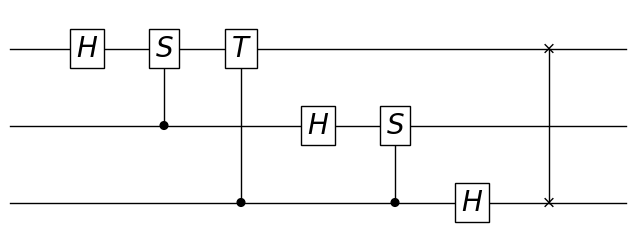

In [5]:
from sympy.physics.quantum.circuitplot import circuit_plot
circuit_plot(fourier, nqubits=3)
# %mkdir -p './images' plt.savefig('./images/fig1-circuitplot-qft.pdf', format='pdf')